In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv("winequality-red.csv")

In [8]:
# checking the shape of the data
df.shape

(1599, 12)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features are numerical features.

In [11]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

There are no missing values in the dataframe.

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no values with NA. The data is already clean.

In [13]:
type(list(df.columns))

list

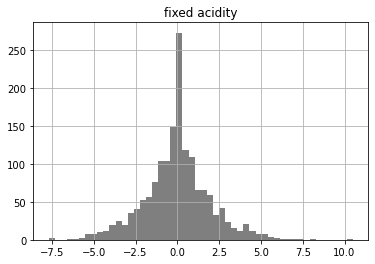

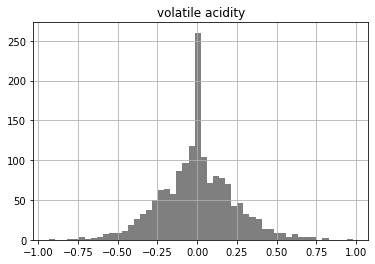

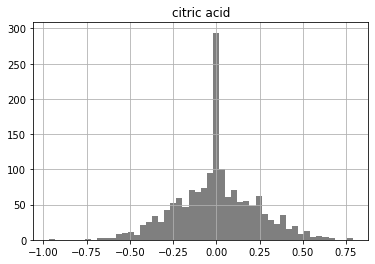

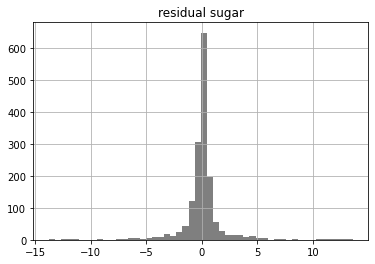

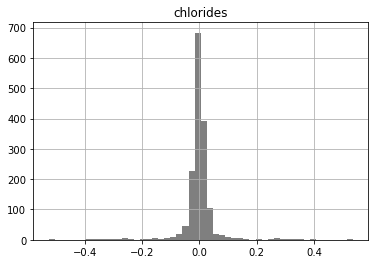

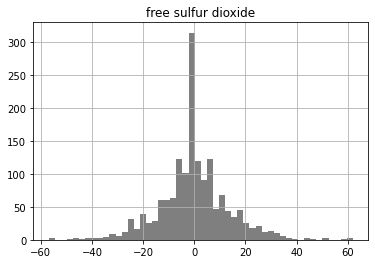

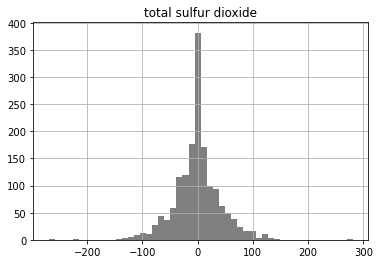

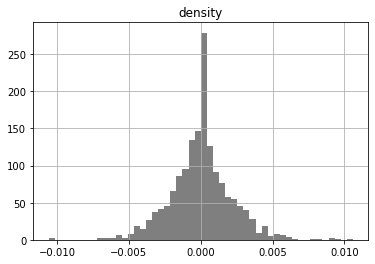

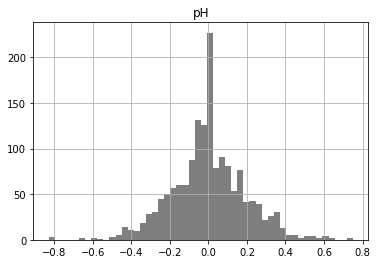

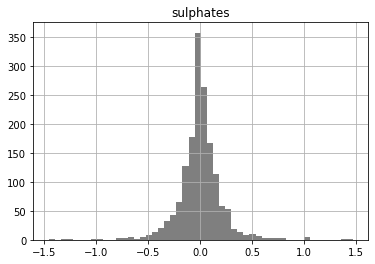

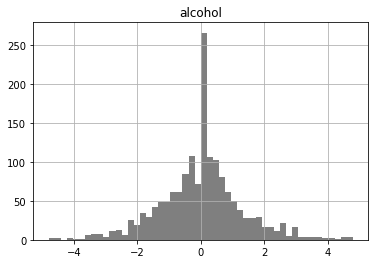

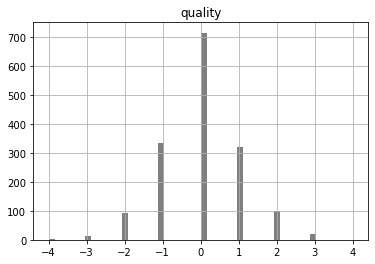

In [14]:
import matplotlib.pyplot as plt
num_feat = list(df.columns)
#plt.figure()
for i in num_feat:
    plt.figure()
    plt.title(i)
    df[i].diff().hist(color='k', alpha=0.5, bins=50)

All the features are normally and symetrically distributed.

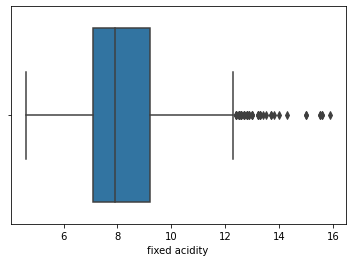

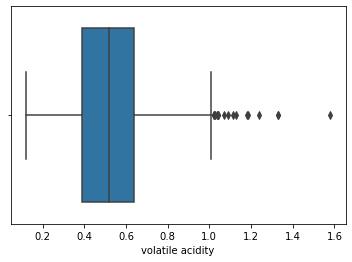

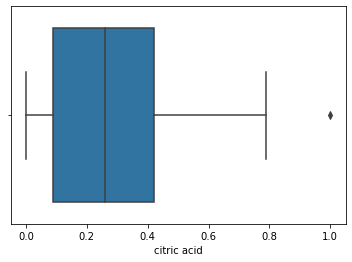

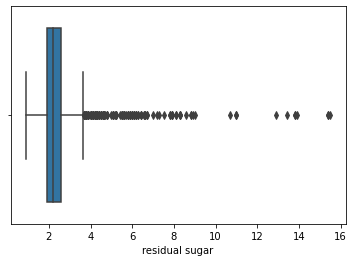

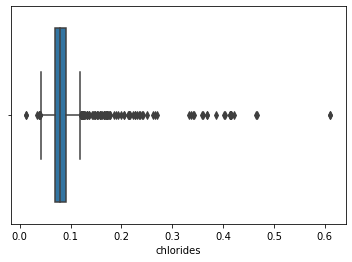

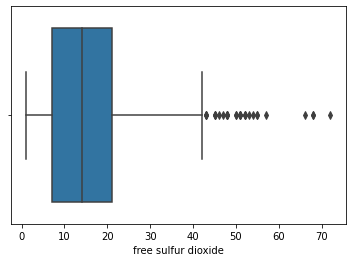

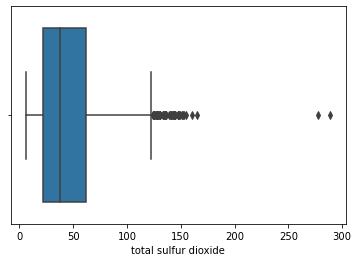

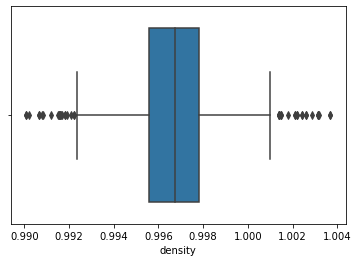

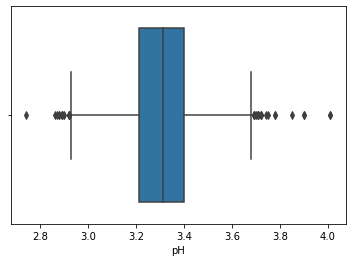

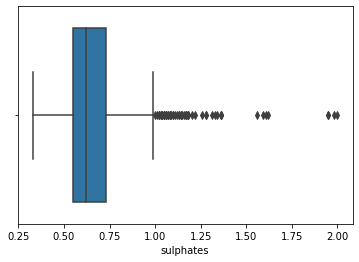

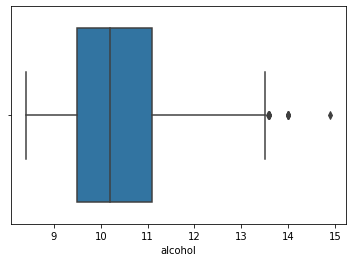

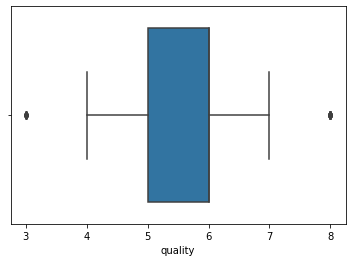

In [15]:
for i in num_feat:
    plt.figure()
    sns.boxplot(x=df[i])

The outliers are present in the most of the features. We have to remove those outliers.

In [16]:
# creating a copy of dataframe
df1 = df
for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    a = df.shape[0]
    b = df1.shape[0]
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df1[i] >= Q1 - 1.5 * IQR) & (df1[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]
    c = df1.shape[0]
    print (round((b-c)*100/a,1),"% rows have been removed from the data frame due to outliers in", i)


3.1 % rows have been removed from the data frame due to outliers in fixed acidity
1.2 % rows have been removed from the data frame due to outliers in volatile acidity
0.1 % rows have been removed from the data frame due to outliers in citric acid
8.6 % rows have been removed from the data frame due to outliers in residual sugar
5.6 % rows have been removed from the data frame due to outliers in chlorides
1.0 % rows have been removed from the data frame due to outliers in free sulfur dioxide
2.3 % rows have been removed from the data frame due to outliers in total sulfur dioxide
0.9 % rows have been removed from the data frame due to outliers in density
1.2 % rows have been removed from the data frame due to outliers in pH
1.3 % rows have been removed from the data frame due to outliers in sulphates
0.1 % rows have been removed from the data frame due to outliers in alcohol
0.9 % rows have been removed from the data frame due to outliers in quality


8.6% of the rows have been removed due to residual sugar. Therefore we have shouldn't remove the outliers from residual sugar feature.

In [17]:
num_feat = list(df.columns)

In [18]:
num_feat.remove("residual sugar")

In [19]:
# creating a copy of dataframe
df1 = df

for i in num_feat:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (df1[i] >= Q1 - 1.5 * IQR) & (df1[i] <= Q3 + 1.5 *IQR)
    df1 = df1.loc[filter]

### splitting the features and the target

In [20]:
X = df1.drop("quality", axis = 1)
y = df1["quality"]

### Scaling the data

Since the range of values of different features is different so the scaling of the data is required.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### splitting the test and training data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Applying the machine learning algorithms

Since the quality of wine has only 9 values therefore, it can be considered as classification problem.

### 1. Decision tree model

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
DT_score = DT.score(X_test, y_test)
DT_score

0.62109375

The accuracy of the decision tree is not significant.

In [25]:
scores = cross_val_score(DT, X_train, y_train, scoring = "f1_macro", cv = 5)
scores

array([0.480088  , 0.5620512 , 0.46224248, 0.54750994, 0.48490449])

The scoring accuracy of the decision tree is not significant even in the cross validation. We can determine the better parameters by grid search for decision tree.

In [26]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "random_state":range(1,20),
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}
grid_DT = GridSearchCV(DT,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_DT.fit(X_train, y_train)

Fitting 5 folds for each of 5472 candidates, totalling 27360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 4120 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 12120 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 23320 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 27360 out of 27360 | elapsed:  1.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'random_state': range(1, 20)},
             verbose=1)

In [27]:
grid_DT.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 13}

In [28]:
DT_final = DecisionTreeClassifier(max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,random_state= 1)
DT_final.fit(X_train, y_train)
scores = cross_val_score(DT_final,X_train, y_train, scoring = "f1_macro", cv = 5 )
scores

array([0.43165676, 0.3832265 , 0.38236613, 0.41141251, 0.4449937 ])

There is no significant improvement even after the parameter optimization. We can further move towards random forest model.

### Random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100)

RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.68359375

The accuracy of the random forest is better than the decision tree.

In [30]:
scores = cross_val_score(RF,X_train, y_train, scoring = "f1_macro", cv = 5 )
scores

array([0.54394121, 0.46533229, 0.43392966, 0.52701518, 0.52252216])

In [82]:
param_dict = {
    "n_estimators":range(50,100, 10),
    "max_depth":range(1,10),
    "min_samples_split":range(2,8),
    "min_samples_leaf":range(1,5)
}
grid_RF = GridSearchCV(RF,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_RF.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 15.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [83]:
grid_RF.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

In [85]:
RF_final = RandomForestClassifier(n_estimators = 60, max_depth = 9, min_samples_leaf = 1, min_samples_split = 5)
RF_final.fit(X_train, y_train)
accuracy = RF_final.score(X_test, y_test)
accuracy

0.6640625

The accuracy of random forest is better than decision tree.

### Gradient Boost model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators = 80)

GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.65625

Accuracy of gradient boost is almost same as random forest.

### Stochastic Gradient Classifer

In [34]:
from sklearn.linear_model import SGDClassifier

In [36]:
SGD = SGDClassifier()
SGD.fit(X_train, y_train)
accuracy = SGD.score(X_test, y_test)
accuracy

0.5859375

The accuracy of the random forest is best out of all algorithms.